In [1]:
from __future__ import print_function

import numpy as np
import pandas

import thinkplot
import thinkstats2

%matplotlib inline

# ===========================
#  BEGINNING OF PART 2
# ===========================

data = pandas.read_csv('Batting.csv', header='infer') #read database
atbats = data.AB # At bats
runs = data.R # Runs
hits = data.H # Hits

In [2]:
min(data.H), max(data.H), min(data.AB), max(data.AB) # get ranges of H and AB

# ===========END OF PART 2==============

(0, 262, 0, 716)

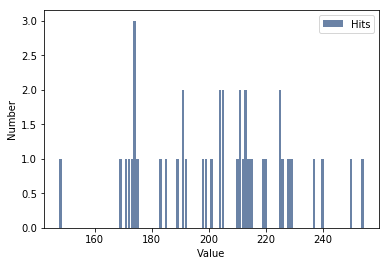

In [3]:
# ===========================
#  BEGINNING OF PART 3
# ===========================

moreThan100Run = data[data.R > 150] # get players higher run values than 150.

histogram = thinkstats2.Hist(moreThan100Run.H, label='Hits') # make a histogram of this values
thinkplot.Hist(histogram)
thinkplot.Config(xlabel='Value',ylabel='Number') #plot it


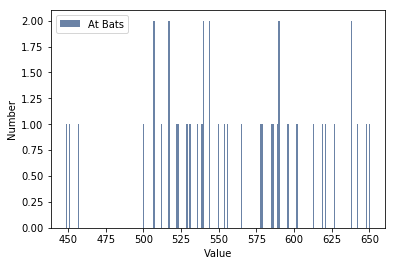

In [4]:
histogram = thinkstats2.Hist(moreThan100Run.AB, label='At Bats') # make a histogram of this values
thinkplot.Hist(histogram)
thinkplot.Config(xlabel='Value',ylabel='Number') #plot it

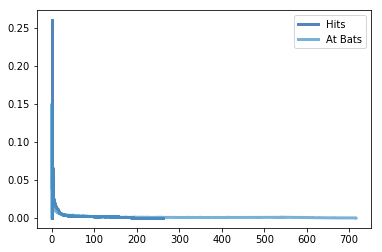

In [5]:
pmf1 = thinkstats2.Pmf(data.H,label='Hits') # set pmf for hits
pmf2 = thinkstats2.Pmf(data.AB,label='At Bats') # set pmf for at bats
#plot them together
thinkplot.PrePlot(2) 
thinkplot.Pmfs([pmf1,pmf2]) 
thinkplot.Config(xlabel='',ylabel='')

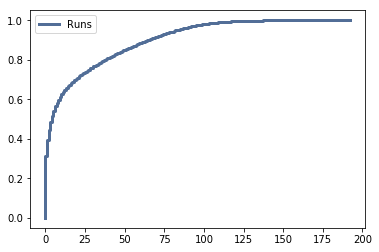

In [6]:
cdf1 = thinkstats2.Cdf(data.R,label='Runs') # plot cdf of runs
thinkplot.Cdf(cdf1)
thinkplot.Config()

# ===========END OF PART 3==============

n, mean, std 102816 17.935907106 26.3739581745


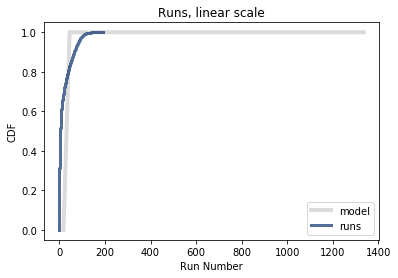

In [7]:
# ===========================
#  BEGINNING OF PART 4
# ===========================

runs = data.R
cdf = thinkstats2.Cdf(runs, label='runs')

mean, var = thinkstats2.TrimmedMeanVar(runs)  #get mean and variance
std = np.sqrt(var)
print('n, mean, std', len(runs), mean, std)

xmin = mean - 50 * std
xmax = mean + 50 * std

xs, ps = thinkstats2.RenderParetoCdf(mean, std, xmin, xmax) # set pareto distribution


thinkplot.Plot(xs, ps, label='model', linewidth=4, color='0.8') #plot with label of model. It will be my distribution model.
thinkplot.Cdf(cdf) #set cdf
thinkplot.Config(title='Runs, linear scale', xlabel='Run Number',
                 ylabel='CDF', loc='lower right') # plot these

# ===========END OF PART 4 ==============

In [8]:
# ===========================
#  BEGINNING OF PART 5
# ===========================

np.corrcoef(data.H,data.AB) # numpy's correlation function

array([[ 1.        ,  0.98761436],
       [ 0.98761436,  1.        ]])

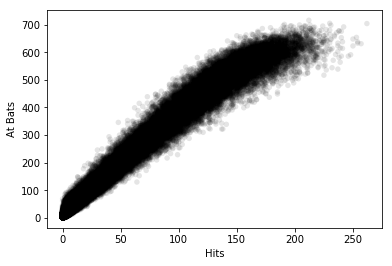

In [9]:
#plot scatter to see relationship visualized.
thinkplot.Scatter(data.H, data.AB, alpha=0.1,color='black') 
thinkplot.Config(xlabel='Hits',
                 ylabel='At Bats',                 
                 legend=False)


# ===========END OF PART 5 ==============

In [10]:
# ===========================
#  BEGINNING OF PART 6
# ===========================


class TestMyHypothesis(thinkstats2.HypothesisTest): #hypothesis testing class

    def TestStatistic(self, data): # First step of hypothesis testing
        group1, group2 = self.data
        test_stat = abs(group1.mean() - group2.mean()) # difference in means between groups
        return test_stat

    def MakeModel(self): #Create model for use.
        group1, group2 = self.data
        self.n, self.m = len(group1), len(group2)
        self.pool = np.hstack((group1, group2))

    def RunModel(self): # Run that model. 
        np.random.shuffle(self.pool) # Shuffle the data
        testdata = self.pool[:self.n], self.pool[self.n:]
        return testdata

In [11]:
AtbatsForHitsLessThan100 = data[data.H < 100].AB # get data's At bats values with hits values smaller than 100
AtbatsForHitsMoreThan100 = data[data.H > 100].AB # get data's At bats values with hits values greater than 100

testdata = AtbatsForHitsLessThan100.values, AtbatsForHitsMoreThan100.values
ht = TestMyHypothesis(testdata) #run class with this data
pvalue = ht.PValue() # get p value
pvalue

1.0

In [12]:
RunsforHitsLessThan100 = data[data.H < 100].R # get data's RUN values with hits values smaller than 100
RunsforHitsMoreThan100 = data[data.H > 100].R # get data's RUN values with hits values greater than 100

testdata = RunsforHitsLessThan100.values, RunsforHitsMoreThan100.values
ht = TestMyHypothesis(testdata) #run class with this data
pvalue = ht.PValue() #get p value
pvalue

1.0

In [13]:
RunsforAtbatsLessThan100 = data[data.AB < 100].R
RunsforAtbatsMoreThan100 = data[data.AB > 100].R

testdata = RunsforAtbatsLessThan100.values, RunsforAtbatsMoreThan100.values
ht = TestMyHypothesis(testdata)
pvalue = ht.PValue()
pvalue


# ===========END OF PART 6==============

1.0